# TomoPy with LPrec
Here is an example on how to use the log-polar based method for reconstruction with TomoPy.
<br>
Notebook source: https://tomopy.readthedocs.io/en/latest/ipynb/lprec.html

In [1]:
import dxchange
import matplotlib.pyplot as plt
import tomopy
import logging
import time
#logging.basicConfig(level=logging.INFO)

In [2]:
proj, flat, dark, theta = dxchange.read_aps_32id(
    fname='/mxn/groups/kits/scisw/jupyterhub/data-for-validations/tomography/tomorec/tooth.h5',
    sino=(0, 2),
)
proj = tomopy.normalize(proj, flat, dark)
rot_center = 296
proj = tomopy.minus_log(proj)
proj[proj < 0] = 0  # no values less than zero with lprec

In [3]:
# auxillairy function to store timing result

def add_tm_result(db, name, t, overwrite=False):
    if (not overwrite) and name in db.keys():
        db[name] = t if t<=db[name] else db[name]
    else:
        db[name] = t
    return tm_db

tm_db = {}

### Reconstruction using FBP method with the log-polar coordinates:
This first reconstruction in the notebook can be slower than the rest, due to some JIT compiling CUDA kernels.
<br>
2021-05-31 - Jason - Added parameter: ncore=1

Note: **<span style="color:red">repeat the cell below twice !!!</span>**

In [21]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='fbp',
                     filter_name='parzen',
                     ncore=1)

tm_db = add_tm_result(tm_db, 'lprec_FBP-filter', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 1.13 s, sys: 162 ms, total: 1.29 s
Wall time: 1.34 s


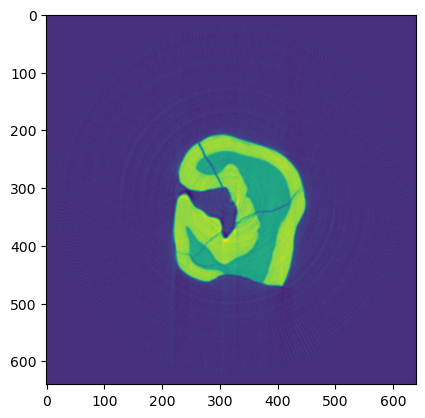

In [5]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the gradient descent method with the log-polar coordinates:
2021-06-01 - Jason - Added parameter: filter_name='none'

Note: **<span style="color:red">repeat the cell below twice !!!</span>**

In [23]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='grad',
                     filter_name='none',
                     ncore=1,
                     num_iter=64,
                     reg_par=-1)

tm_db = add_tm_result(tm_db, 'lprec_GRAD', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 1.27 s, sys: 499 ms, total: 1.77 s
Wall time: 1.78 s


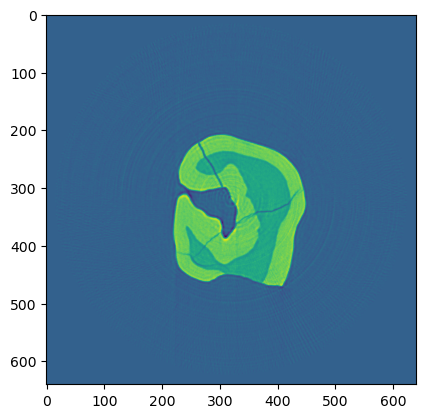

In [7]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the conjugate gradient method with the log-polar coordinates.
2021-06-01 - Jason - Added parameter: filter_name='none'

Note: **<span style="color:red">repeat the cell below twice !!!</span>**

In [25]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='cg',
                     filter_name='none',
                     ncore=1,
                     num_iter=16,
                     reg_par=-1)

tm_db = add_tm_result(tm_db, 'lprec_CG', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 1.17 s, sys: 362 ms, total: 1.53 s
Wall time: 1.54 s


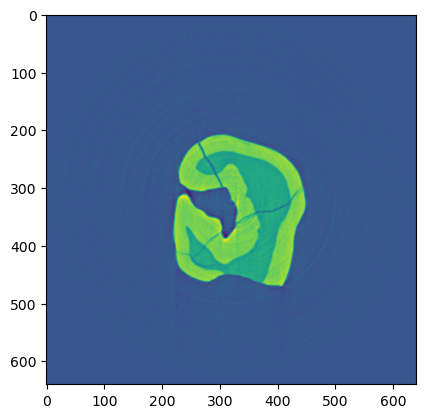

In [9]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the TV method with the log-polar coordinates. It gives piecewise constant reconstructions and can be used for denoising.
2021-06-01 - Jason - Added parameter: filter_name='none'

Note: **<span style="color:red">repeat the cell below twice !!!</span>**

In [27]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='tv',
                     filter_name='none',
                     ncore=1,
                     num_iter=512,
                     reg_par=5e-4)

tm_db = add_tm_result(tm_db, 'lprec_TV', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 2.84 s, sys: 1.33 s, total: 4.17 s
Wall time: 4.25 s


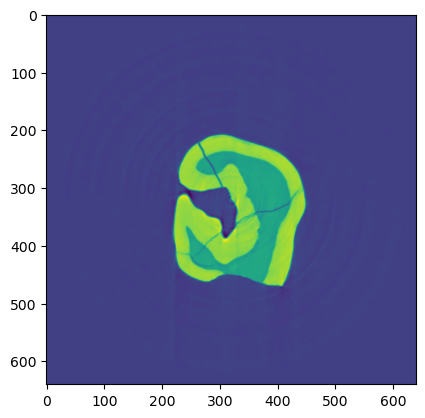

In [11]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the TV-entropy method with the log-polar coordinates. It can be used for suppressing Poisson noise.
2021-06-01 - Jason - Added parameter: filter_name='none'

Note: **<span style="color:red">repeat the cell below twice !!!</span>**

In [29]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='tve',
                     filter_name='none',
                     ncore=1,
                     num_iter=512,
                     reg_par=2e-4)

tm_db = add_tm_result(tm_db, 'lprec_TVE', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 3.38 s, sys: 865 ms, total: 4.24 s
Wall time: 4.26 s


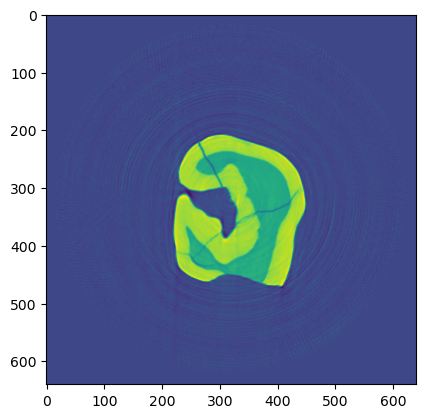

In [13]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the TV-l1 method with the log-polar coordinates. It can be used to remove structures of an image of a certain scale, and the regularization parameter 𝜆 can be used for scale selection.
2021-06-01 - Jason - Added parameter: filter_name='none'

Note: **<span style="color:red">repeat the cell below twice !!!</span>**

In [31]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='tvl1',
                     filter_name='none',
                     ncore=1,
                     num_iter=512,
                     reg_par=3e-2)

tm_db = add_tm_result(tm_db, 'lprec_TVL1', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 3.4 s, sys: 954 ms, total: 4.36 s
Wall time: 4.42 s


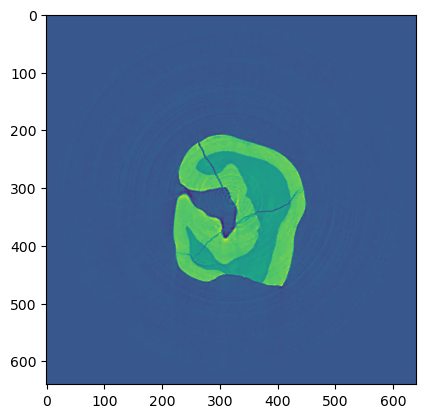

In [15]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

### Reconstruction using the MLEM method with the log-polar coordinates.
2021-06-01 - Jason - Added parameter: filter_name='none'

Note: **<span style="color:red">repeat the cell below twice !!!</span>**

In [33]:
%%time

start = time.time()

recon = tomopy.recon(proj,
                     theta,
                     center=rot_center,
                     algorithm=tomopy.lprec,
                     lpmethod='em',
                     filter_name='none',
                     ncore=1,
                     num_iter=64,
                     reg_par=0.05)

tm_db = add_tm_result(tm_db, 'lprec_EM', time.time()-start);

Reconstructing 1 slice groups with 1 master threads...
CPU times: user 1.28 s, sys: 502 ms, total: 1.79 s
Wall time: 1.79 s


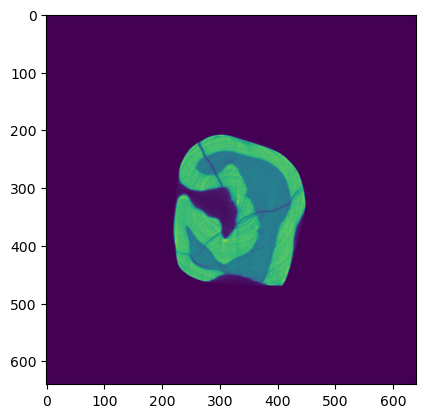

In [17]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.imshow(recon[0, :, :])
plt.show()

In [34]:
print("%20s\t %10s" % ('algorithm','time (msec)',))
print("---------------------------------------------")

for name in tm_db.keys():
    print("%20s\t %10.0f" % (name,tm_db[name]*1000,))

           algorithm	 time (msec)
---------------------------------------------
    lprec_FBP-filter	       1300
          lprec_GRAD	       1775
            lprec_CG	       1538
            lprec_TV	       4182
           lprec_TVE	       4253
          lprec_TVL1	       4316
            lprec_EM	       1787


In [35]:
import json
with open('tooth_lprec.json','w') as fid:
    json.dump(tm_db,fid)